# Data Viz: Presentation Style

## Imports

In [1]:
# import data
import pickle

# data manipulation
import pandas as pd
from datetime import datetime

# plotting and viz
import matplotlib.pyplot as plt
import seaborn as sns

# maps
import plotly.express as px
import pydeck as pdk

# interactivity
from ipywidgets import interact

## Prepping Data: Import & Sampling

In [2]:
pickle_path = ('../raw_data/viz.pickle')

with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
inf = data['period'] > datetime(2016, 1, 1, 0, 0, 0)
sup = data['period'] < datetime(2019, 1, 1, 0, 0, 0)
df = data[ inf & sup ]

In [4]:
df.shape

(1424617, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424617 entries, 2 to 6983206
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   precinct_number  1424617 non-null  int64  
 1   offense_type     1424617 non-null  object 
 2   crime_completed  1424617 non-null  object 
 3   offense_level    1424617 non-null  object 
 4   premise_desc     1424617 non-null  object 
 5   premise          1424617 non-null  object 
 6   jurisdiction     1424617 non-null  object 
 7   park_name        1424617 non-null  object 
 8   suspect_age      1424617 non-null  object 
 9   suspect_race     1424617 non-null  object 
 10  suspect_sex      1424617 non-null  object 
 11  latitude         1424617 non-null  float64
 12  longitude        1424617 non-null  float64
 13  metro            1424617 non-null  object 
 14  victim_age       1424617 non-null  object 
 15  victim_race      1424617 non-null  object 
 16  victim_sex       1

## Viz over Time

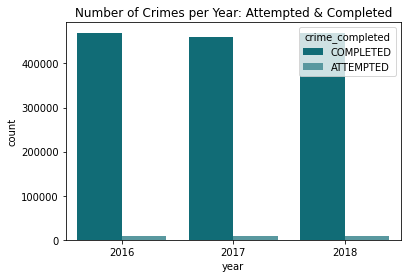

In [5]:
# Number of Crimes per Year
sns.countplot(x = 'year', hue = 'crime_completed', data = df, palette = sns.color_palette(["#007a87", "#4da2ab"]))
plt.title('Number of Crimes per Year: Attempted & Completed');

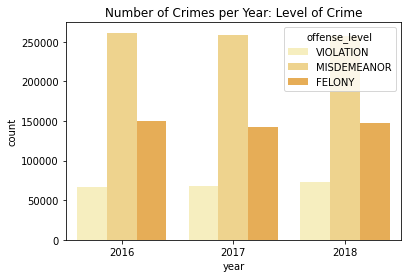

In [12]:
# Number of Crimes per Year
sns.countplot(x = 'year', hue = 'offense_level', data = df, palette = sns.color_palette("YlOrBr"))
plt.title('Number of Crimes per Year: Level of Crime');

In [17]:
df['month'][2].strftime("%B")

AttributeError: 'numpy.int64' object has no attribute 'strftime'

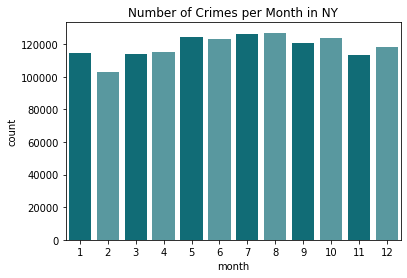

In [7]:
# Number of Crimes per Month
sns.countplot(x = 'month', data = df, palette = sns.color_palette(["#007a87", "#4da2ab"]))
plt.title('Number of Crimes per Month in NY');

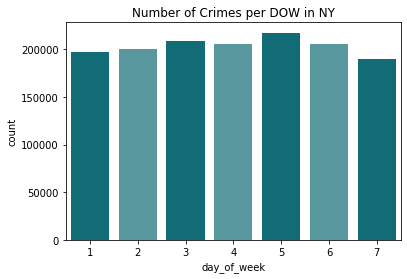

In [8]:
# Number of Crimes per Month
sns.countplot(x = 'day_of_week', data = df, palette = sns.color_palette(["#007a87", "#4da2ab"]))
plt.title('Number of Crimes per DOW in NY');

In [ ]:
time_s = df.groupby(['year', 'month'], as_index=False).count()

time_series = time_s[['year', 'month', 'crime_completed']].rename(columns={'crime_completed':'nb_of_crimes'})

time_series.head()